Linear Regression Evaluation:
MAE: 4186.508898366437
MSE: 33635210.43117845
RMSE: 5799.5870914383595
R^2: 0.7833463107364536
----------------------------------------
Random Forest Evaluation:
MAE: 2493.095046233551
MSE: 20901488.205233127
RMSE: 4571.814541867718
R^2: 0.8653677359911911
----------------------------------------
Gradient Boosting Evaluation:
MAE: 2447.5589384519903
MSE: 18994440.011504516
RMSE: 4358.2611224552065
R^2: 0.8776515606344196
----------------------------------------
XGBoost Evaluation:
MAE: 2791.8325179517183
MSE: 23261243.811358407
RMSE: 4822.991168492682
R^2: 0.8501678977480663
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Neural Network Evaluation:
MAE: 3911.7584258627853
MSE: 31093288.945921138
RMSE: 5576.135664232098
R^2: 0.7997195297691129
----------------------------------------


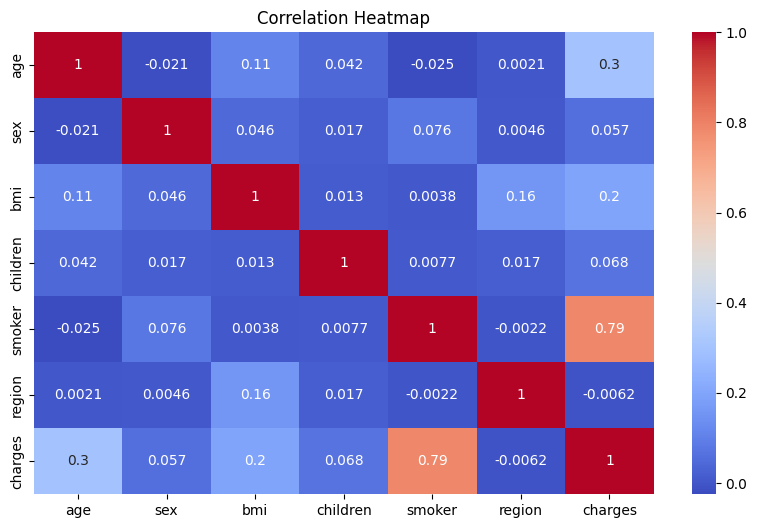

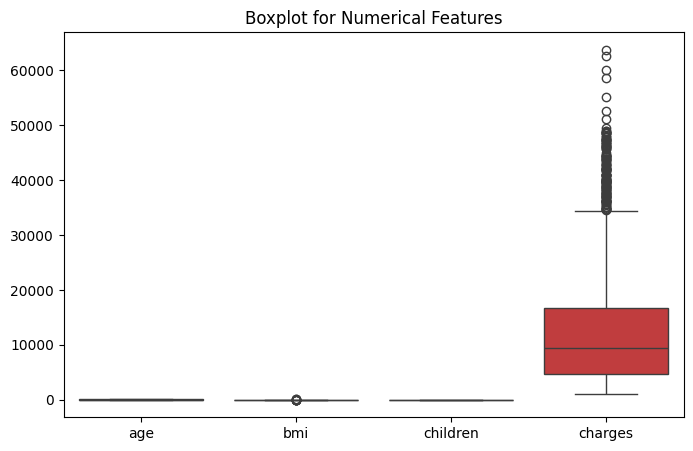

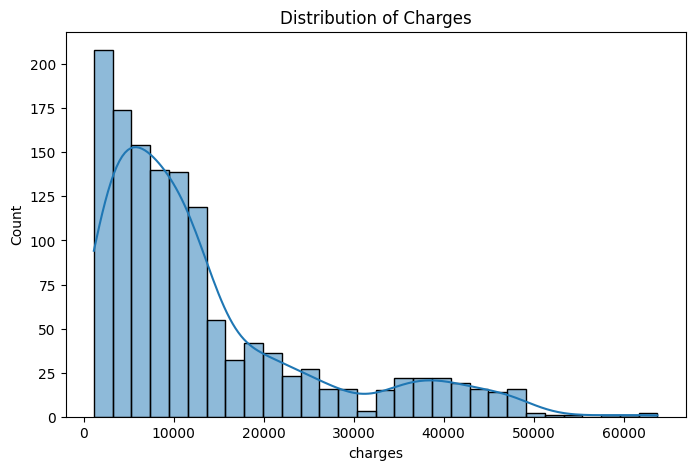

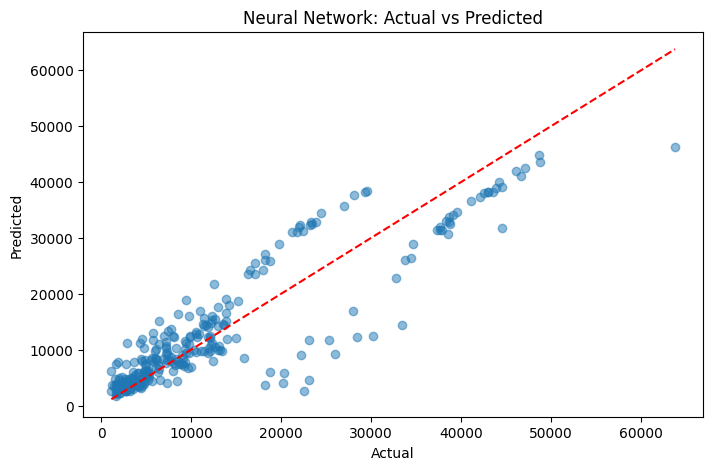

In [ ]:
# Install necessary packages (run these in your terminal or notebook if needed)
# pip install pandas numpy matplotlib seaborn scikit-learn xgboost tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense

# Load dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Feature and target
X = df.drop('charges', axis=1)
y = df['charges']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R^2:", r2_score(y_true, y_pred))
    print("-" * 40)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", y_test, lr.predict(X_test))

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
evaluate_model("Random Forest", y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
evaluate_model("Gradient Boosting", y_test, gb.predict(X_test))

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", y_test, xgb.predict(X_test))

# Neural Network (Keras)
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)
y_pred_nn = model.predict(X_test).flatten()
evaluate_model("Neural Network", y_test, y_pred_nn)

# Visualizations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplot for Numerical Features")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Actual vs Predicted plot for Neural Net
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


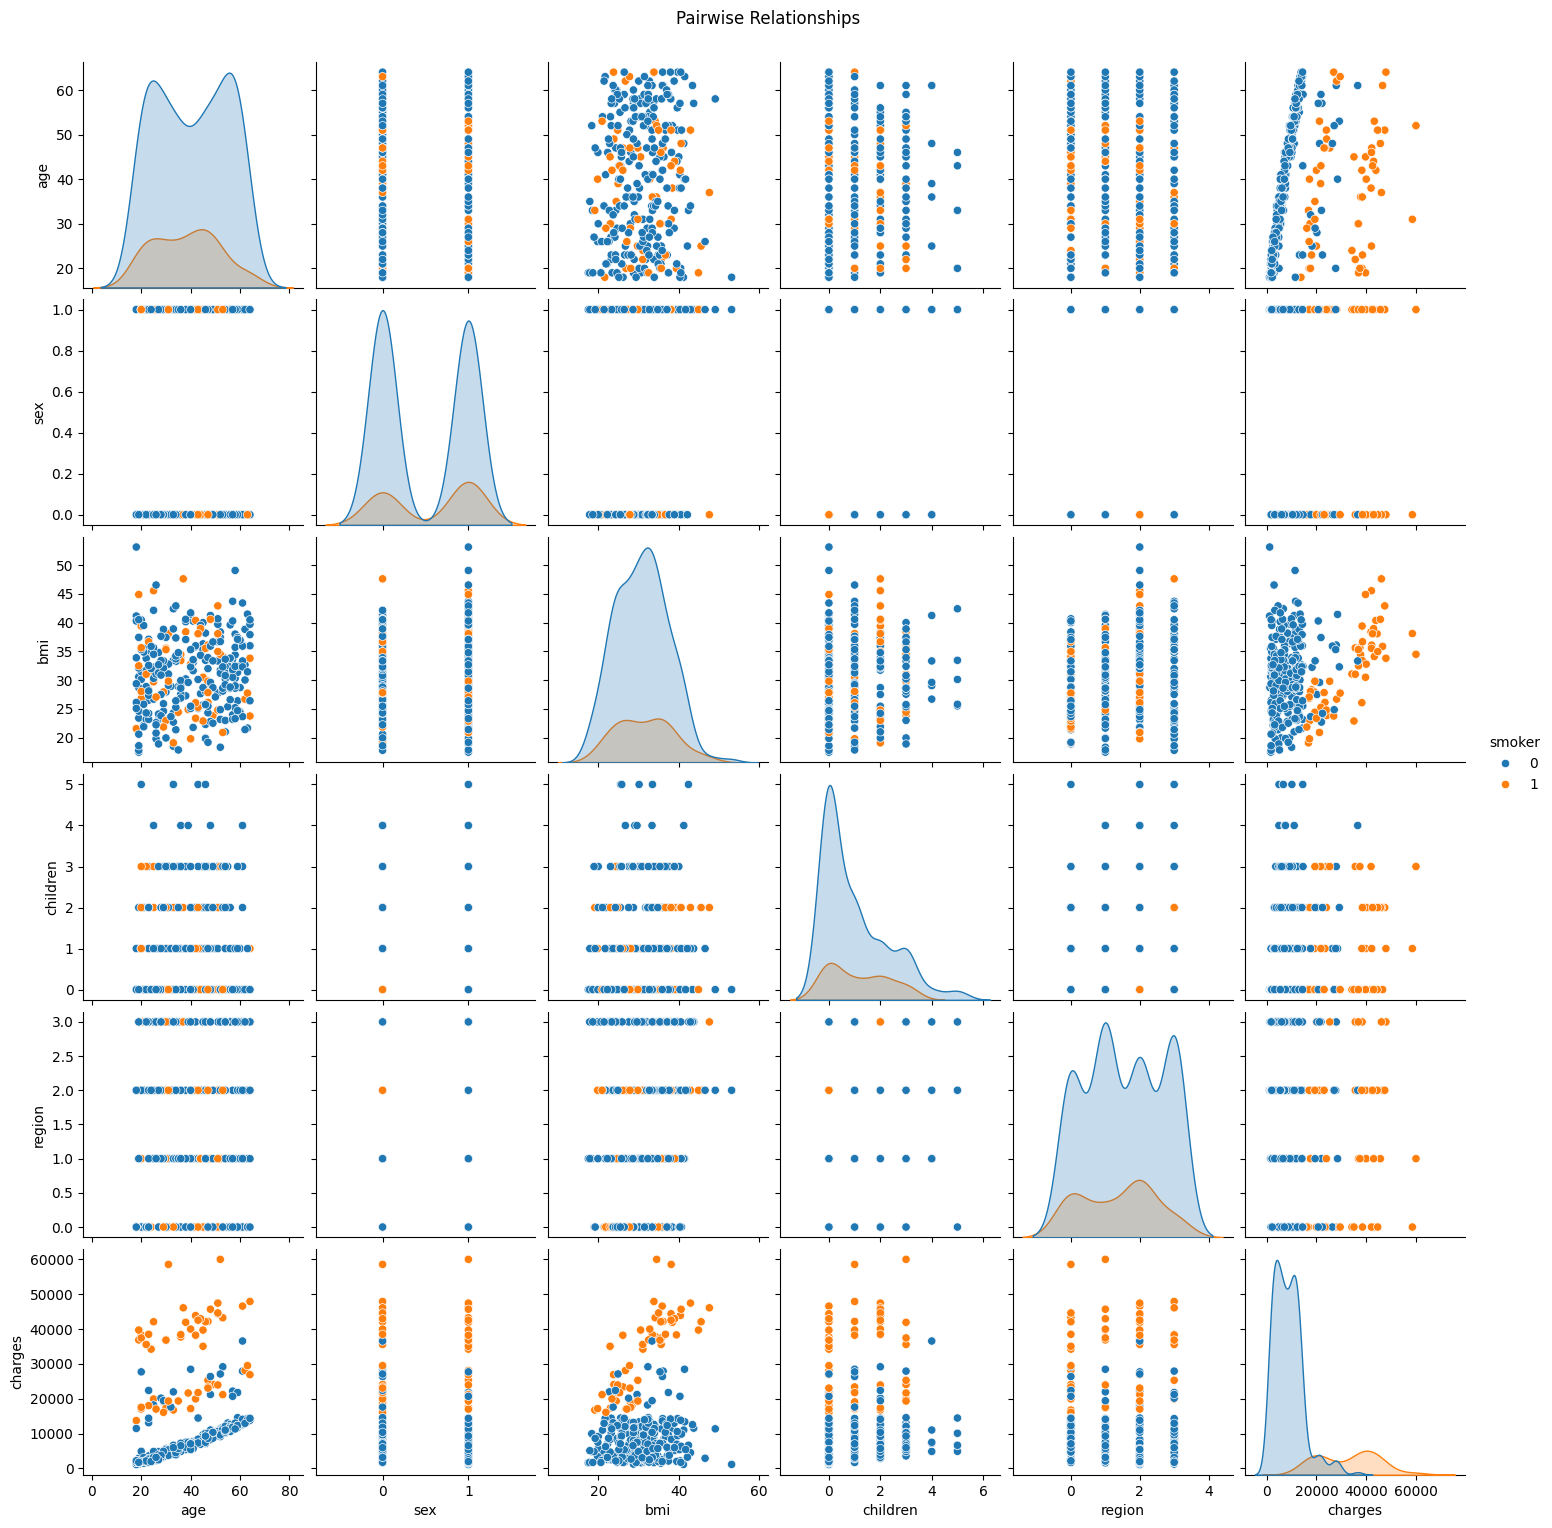

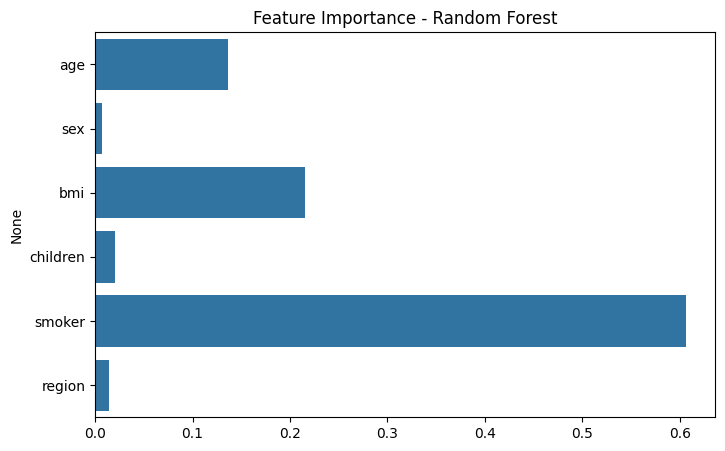

In [ ]:
# Plot pairwise relationships (sampling to reduce plot clutter)
sns.pairplot(df.sample(300), hue='smoker')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
# Feature Importance from Random Forest
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()
